In [ ]:
Preprocessing (data 분류)

In [37]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import isfile, join

import os
import shutil

In [38]:
# 전체 확진자

df = pd.read_csv('merge - merge.csv')
whole = df.iloc[:,:2]
whole.columns=['id','status']
whole.dropna(inplace=True)
whole

,id,status
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,healthy
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,healthy
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,healthy
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,healthy
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,healthy
...,...,...
2833,aHJPsm6esHeW5apkd8KAFdia9zj2,positive_mild
2834,HYGtUoMDukOlfkkQ7rgRPhuKorA3,positive_mild
2836,vK2bLRNzllXNeyOMudnNSL5cfpG2,healthy
2837,bjA2KpSxneNskrLBeqi4bqoTDQl2,healthy


In [39]:
#pos 와 neg 로 분류
whole['status'] = whole['status'].replace(['healthy','resp_illness_not_identified','recovered_full'],'neg')
whole['status'] = whole['status'].replace(['positive_mild', 'positive_moderate' , 'positive_asymp'],'pos')

whole

,id,status
0,vK2bLRNzllXNeyOMudnNSL5cfpG2,neg
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,neg
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,neg
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,neg
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,neg
...,...,...
2833,aHJPsm6esHeW5apkd8KAFdia9zj2,pos
2834,HYGtUoMDukOlfkkQ7rgRPhuKorA3,pos
2836,vK2bLRNzllXNeyOMudnNSL5cfpG2,neg
2837,bjA2KpSxneNskrLBeqi4bqoTDQl2,neg


In [71]:
# 중복값 확인
whole.duplicated(['id'],keep='first')
# 중복값 제거 
whole.drop_duplicates(['id'],keep='first',inplace=True)
whole = whole.iloc[1:,:]
whole

,id,status
1,bjA2KpSxneNskrLBeqi4bqoTDQl2,neg
2,FSzobvJqOXf0rI6X05cHqOiU9Mu2,neg
3,EqDWckxbsETyHUeBLQ8jLtxlhir2,neg
4,FGRDO4IBbAejR0WHD5YbkXTCasg2,neg
5,htQzROl26OWQpIYFDzv11F79PLR2,neg
...,...,...
1412,JuzR5zpE9HU3NsFabIcz4Kkp0Ag1,neg
1413,pvX8fr2fMcebtfWq2wXqyIp56PL2,neg
1414,IFMid2LmeCTSQAFaL8wTSUg20No2,pos
1415,aHJPsm6esHeW5apkd8KAFdia9zj2,pos


In [97]:
# 전처리 후 csv 파일 저장
whole.to_csv('final_merge.csv', index=False, encoding='cp949')

neg                        1222
pos                          87
no_resp_illness_exposed      85
Name: status, dtype: int64


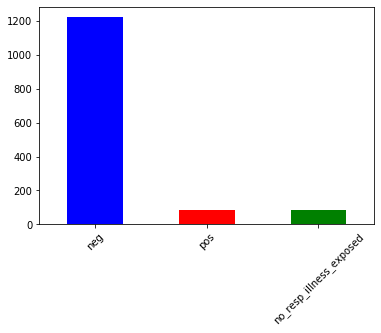

In [148]:
# 최종 전체 확진자 비율 확인 
ax = whole['status'].value_counts().plot.bar(color=['blue', 'red','green'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
print(whole['status'].value_counts())

In [95]:
#전체 파일 확인
import os 
wav = os.listdir('C:/Users/smile/ai_team/covid_audio_data/coswara_data/20200413')

In [104]:
# csv 파일이 values 가 실제 데이터랑 맞는지 확인
for i in whole['id']:
    if i in wav:
        pass
    else:
        pass

In [142]:
#전체 파일 확인
import os 
files_neg= os.listdir('train/neg')
# print(files_neg)
files_pos= os.listdir('train/pos')
# print(files_pos)

In [147]:
#전체 파일 확인
for i in files_neg:
        file= os.listdir('train/neg/'+i)
        # print(file)
        
for i in files_pos:
        file= os.listdir('train/pos/'+i)
        # print(file)
    
print(len(files_pos))

87


In [138]:
# cough 파일 만들기
os.mkdir('train/' + 'pos_cough')
os.mkdir('train/' + 'neg_cough')

In [133]:
# neg_cough 데이터 복사(heavy와 shallow)
for i in files_neg:
    shutil.copy('train/neg/' + i+ '/'+'cough-heavy.wav', 'train/neg_cough/' +i+ 'cough-heavy.wav')
for i in files_neg:
    try:
        shutil.copy('train/neg/' + i+ '/'+'cough-shallow.wav', 'train/neg_cough/' +i+ 'cough-shallow.wav')
    except:
        pass

In [144]:
#pos_cough 데이터 복사(heavy와 shallow)
for i in files_pos:
    try:
        shutil.copy('train/pos/' + i+ '/'+'cough-heavy.wav', 'train/pos_cough/' +i+ 'cough-heavy.wav')
    except:
        pass
for i in files_pos:
    try:
        shutil.copy('train/pos/' + i+ '/'+'cough-shallow.wav', 'train/pos_cough/' +i+ 'cough-shallow.wav')
    except:
        pass